In [1]:
import pandas as pd
cols = pd.read_csv("var_names.csv")
data = pd.read_csv('CSCS_data_anon.csv', low_memory=False,
                        na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only
data = data[data.REMOVE_case=='No'].copy()

In [2]:
def get_matching_keywords(keywords: list[str]) -> list[str]:
    """
    Returns the names of the columns whos string contains any of the keywords
    """
    global data
    return [col for col in data.columns if any(keyword.lower() in col.lower() for keyword in keywords)]

def get_var_details(var_name: str) -> list[tuple[str, str]]:
    """
    Returns a list of pairs detailing the question and datasets 
    corresponding to the given variable name
    """
    global cols
    filtered_data = cols[cols['new_var'] == var_name]
    
    info = []
    result: pd.DataFrame = filtered_data[['new_var', 'text', 'dataset']]
    for index, row in result.iterrows():
        info.append((row['text'], row['dataset']))

    return info

def get_column_info(column_name: str) -> None:
    """
    Returns information about a given column
    """
    global data, cols
    column_info: pd.DataFrame = data[column_name]
    print(f"{' Information about: ' + column_name + ' ':-^70}")
    details = get_var_details(column_name)
    if not details: print(f"{' No associated question found ':-^70}")
    for question, dataset in details:
        print(f"{' Dataset: ' + dataset + ' ':-^70}")
        print(f"{' Question: ' + question + ' ':-^70}")
        print(f"{'':-^70}\n")
    print(f"Number of NA: {column_info.isna().sum()}")
    print(column_info.value_counts())
    print("")

In [3]:
words = ["busy"]
to_examine = get_matching_keywords(words)

for col in to_examine:
    get_column_info(col)

------- Information about: CONNECTION_social_barriers_too_busy -------
------------------------ Dataset: 2022_cohort ------------------------
 Question: Which of the barriers listed below prevent you from socializing with others as much as you would like to? - I am too busy 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cross -------------------------
 Question: Which of the barriers below make it difficult for you to socialize with others as much as you would like to? (Check all that apply) - Selected Choice - I am too busy  
----------------------------------------------------------------------

Number of NA: 9075
CONNECTION_social_barriers_too_busy
Not Selected     756
I am too busy    187
Name: count, dtype: int64

--- Information about: CONNECTION_social_barriers_people_too_busy ----
------------------------ Dataset: 2022_cohort ------------------------
 Question: Which of the barriers listed below prevent you from s

In [4]:
busy_people = data.loc[data["CONNECTION_social_barriers_too_busy"] == "I am too busy"]
non_busy_people = data.loc[data["CONNECTION_social_barriers_too_busy"] == "Not Selected"]
print(busy_people.shape, non_busy_people.shape)

(187, 1779) (756, 1779)


In [5]:
words = ["lonely"]
to_examine = get_matching_keywords(words)

for col in to_examine:
    get_column_info(col)

--- Information about: LONELY_ucla_loneliness_scale_companionship ----
------------------------ Dataset: 2021_cross -------------------------
 Question: Indicate how often each of the statements below is descriptive of you. - How often do you feel that you lack companionship? 
----------------------------------------------------------------------

------------------------ Dataset: 2022_cohort ------------------------
 Question: Indicate how often each of the statements below is descriptive of you. - How often do you feel that you lack companionship? 
----------------------------------------------------------------------

------------------------ Dataset: 2023_cohort ------------------------
 Question: Indicate how often each of the statements below is descriptive of you. - How often do you feel that you lack companionship? 
----------------------------------------------------------------------

Number of NA: 6764
LONELY_ucla_loneliness_scale_companionship
Some of the time    1650
Hardl

In [6]:
get_column_info("LONELY_direct")

------------------ Information about: LONELY_direct ------------------
------------------------ Dataset: 2021_cross -------------------------
------- Question: During the PAST WEEK, have you felt lonely  --------
----------------------------------------------------------------------

------------------------ Dataset: 2022_cohort ------------------------
------- Question: During the PAST WEEK, have you felt lonely  --------
----------------------------------------------------------------------

------------------------ Dataset: 2022_cross -------------------------
------- Question: During the PAST WEEK, have you felt lonely  --------
----------------------------------------------------------------------

------------------------ Dataset: 2023_cohort ------------------------
------- Question: During the PAST WEEK, have you felt lonely  --------
----------------------------------------------------------------------

------------------------ Dataset: 2023_cross -------------------------
--

In [7]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming `data` is your DataFrame

# Filter out rows with NaN in the relevant columns
filtered_data = data[['LONELY_direct', 'CONNECTION_social_barriers_too_busy']].dropna()

# Convert 'CONNECTION_social_barriers_too_busy' to an indicator variable
filtered_data['too_busy_indicator'] = (filtered_data['CONNECTION_social_barriers_too_busy'] == 'I am too busy').astype(int)

# Create a contingency table
contingency_table = pd.crosstab(filtered_data['LONELY_direct'], filtered_data['too_busy_indicator'])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")


Chi-square Statistic: 16.77076669305148
P-value: 0.002141540539650316
Degrees of Freedom: 4
Expected Frequencies: 
[[ 60.96170213  15.03829787]
 [150.8         37.2       ]
 [147.59148936  36.40851064]
 [198.12553191  48.87446809]
 [196.5212766   48.4787234 ]]


In [8]:
# get_column_info("LONELY_direct")

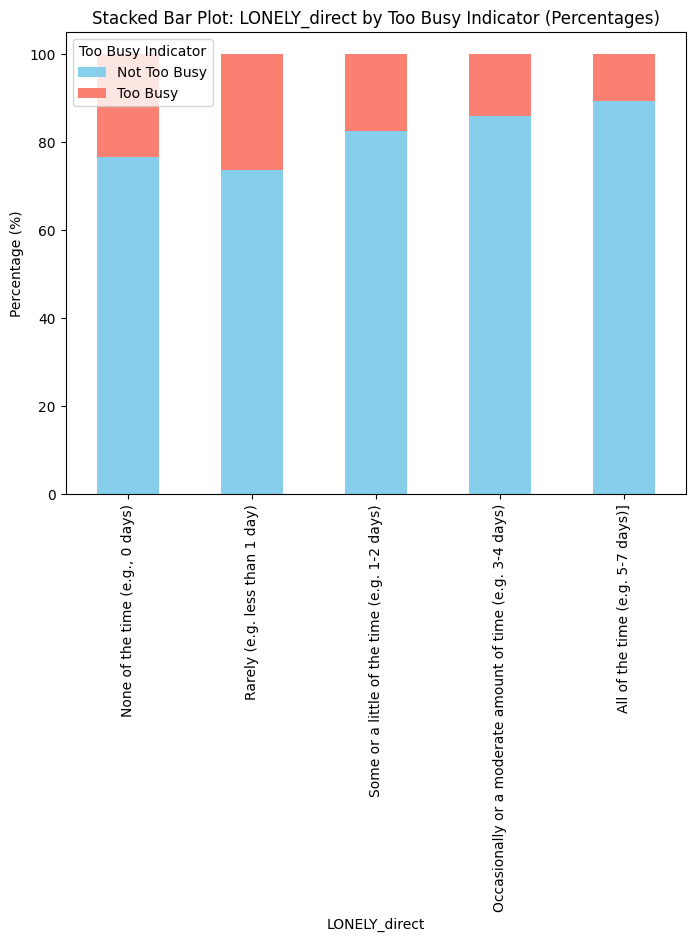

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# Filter out rows with NaN in the relevant columns
filtered_data = data[['LONELY_direct', 'CONNECTION_social_barriers_too_busy']].dropna()

# Convert 'CONNECTION_social_barriers_too_busy' to an indicator variable
filtered_data['too_busy_indicator'] = (filtered_data['CONNECTION_social_barriers_too_busy'] == 'I am too busy').astype(int)

# Define the custom order for 'LONELY_direct'
lonely_order = [
    'None of the time (e.g., 0 days)', 
    'Rarely (e.g. less than 1 day)', 
    'Some or a little of the time (e.g. 1-2 days)', 
    'Occasionally or a moderate amount of time (e.g. 3-4 days)', 
    'All of the time (e.g. 5-7 days)]'
]

# Convert 'LONELY_direct' to a categorical variable with the specified order
filtered_data['LONELY_direct'] = pd.Categorical(filtered_data['LONELY_direct'], categories=lonely_order, ordered=True)

# Create a contingency table
contingency_table = pd.crosstab(filtered_data['LONELY_direct'], filtered_data['too_busy_indicator'])

# Normalize the contingency table by row to get percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart with percentages
contingency_table_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])

# Set plot labels and title
plt.xlabel('LONELY_direct')
plt.ylabel('Percentage (%)')
plt.title('Stacked Bar Plot: LONELY_direct by Too Busy Indicator (Percentages)')

# Add legend
plt.legend(title='Too Busy Indicator', labels=['Not Too Busy', 'Too Busy'])

plt.show()


In [10]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming `data` is your DataFrame

# Filter out rows with NaN in the relevant columns
filtered_data = data[['LONELY_direct', 'CONNECTION_social_barriers_too_busy']]  # Example of additional predictors
filtered_data = filtered_data.dropna()

print(f"Before: {filtered_data.shape}")
# Update the mapping for LONELY_direct based on the provided categories
lonely_mapping = {
    'None of the time (e.g., 0 days)': 1,
    'Rarely (e.g. less than 1 day)': 2,
    'Some or a little of the time (e.g. 1-2 days)': 3,
    'Occasionally or a moderate amount of time (e.g. 3-4 days)': 4,
    'All of the time (e.g. 5-7 days)]': 5
}

# Apply the mapping to the 'LONELY_direct' column
filtered_data['LONELY_direct'] = filtered_data['LONELY_direct'].map(lonely_mapping)

# Ensure that 'LONELY_direct' is numeric
filtered_data['LONELY_direct'] = pd.to_numeric(filtered_data['LONELY_direct'], errors='coerce')

# Drop rows where 'LONELY_direct' is NaN after conversion
filtered_data = filtered_data.dropna()

print(f"After: {filtered_data.shape}")

Before: (940, 2)
After: (940, 2)


In [11]:


# Convert 'CONNECTION_social_barriers_too_busy' to an indicator variable
filtered_data['too_busy_indicator'] = (filtered_data['CONNECTION_social_barriers_too_busy'] == 'I am too busy').astype(int)

# Fit the multiple regression model using smf.ols (formula interface)
# model = smf.ols('LONELY_direct ~ too_busy_indicator + DEMO_age + C(DEMO_gender)', data=filtered_data).fit()
model = smf.ols('LONELY_direct ~ too_busy_indicator', data=filtered_data).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          LONELY_direct   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     13.39
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           0.000267
Time:                        16:49:31   Log-Likelihood:                -1514.2
No. Observations:                 940   AIC:                             3032.
Df Residuals:                     938   BIC:                             3042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.7666      0

C:\Users\Cayden Wong\AppData\Local\Temp\ipykernel_9368\2923402908.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette='coolwarm')


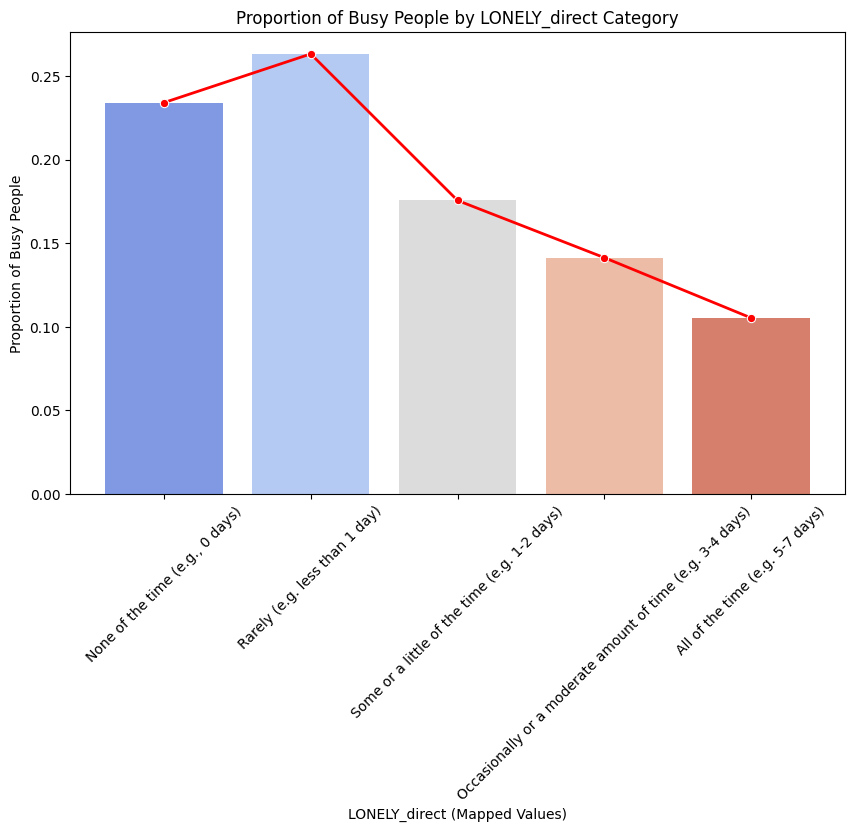

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame

# Filter out rows with NaN in the relevant columns
filtered_data = data[['LONELY_direct', 'CONNECTION_social_barriers_too_busy']]  
filtered_data = filtered_data.dropna()

# Update the mapping for LONELY_direct based on the provided categories
lonely_mapping = {
    'None of the time (e.g., 0 days)': 1,
    'Rarely (e.g. less than 1 day)': 2,
    'Some or a little of the time (e.g. 1-2 days)': 3,
    'Occasionally or a moderate amount of time (e.g. 3-4 days)': 4,
    'All of the time (e.g. 5-7 days)]': 5
}

# Apply the mapping to the 'LONELY_direct' column
filtered_data['LONELY_direct'] = filtered_data['LONELY_direct'].map(lonely_mapping)

# Convert 'CONNECTION_social_barriers_too_busy' to an indicator variable
filtered_data['too_busy_indicator'] = (filtered_data['CONNECTION_social_barriers_too_busy'] == 'I am too busy').astype(int)

# Calculate the proportion of busy people (too_busy_indicator = 1) within each LONELY_direct category
proportions = filtered_data.groupby('LONELY_direct')['too_busy_indicator'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Bar plot showing the proportion of busy people to non-busy people for each LONELY_direct category
sns.barplot(x=proportions.index, y=proportions.values, palette='coolwarm')

# Add a trend line (using a line plot)
sns.lineplot(x=proportions.index - 1, y=proportions.values, color='red', marker='o', linewidth=2)

# Set plot labels and title
plt.xlabel('LONELY_direct (Mapped Values)')
plt.ylabel('Proportion of Busy People')
plt.title('Proportion of Busy People by LONELY_direct Category')

# Set x-axis labels based on the original mapping for better interpretation
plt.xticks(ticks=proportions.index - 1, labels=[
    'None of the time (e.g., 0 days)', 
    'Rarely (e.g. less than 1 day)', 
    'Some or a little of the time (e.g. 1-2 days)', 
    'Occasionally or a moderate amount of time (e.g. 3-4 days)', 
    'All of the time (e.g. 5-7 days)'
], rotation=45)

# plt.tight_layout()  # To ensure the labels don't get cut off
plt.show()
